# Project: Lets pick a "good" movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

COVID-19 lockdown, late evening on one fine weekday, you're sitting at home after long hours working from home, you don't remember if you have ever left your seat since the morning. You grab a snak and you feel like; "I want to watch a movie, what do I want to watch", the simplest yet toughest question there is!

So you open your favourite streaming service and start scorrling through hundrades of movie names, geners, tags, keywords. You just want to watch a good movie but you drawn in endless strings of texts.

Assuming that films with high revenue are good movies; are there specific keywords that you can look for within the film description, synopsis, taglines and other texts to help you find a good movie to watch? can actors names be an indication for a good movie? and what other attributes can help us find a good movie?

In this notebook we will use the adjusted film revenues of films as dependant variable (target) and we will try to find if keywords and actors names can impact the adjusted film revenue, also we will explore the available dataset to find other numerical factors that impact adjusted revenues. 


In [1]:
#import libraries and packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
# dataset dimensions
df.shape

(10866, 21)

In [4]:
# dataset attributes
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# data type for each attribute
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# number of missing values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# a quick look at dataset, we will focus on the adjusted revenue at this point
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

The min adjusted revenue is 0

The 25 percentile adjusted revenue is 0

The 50 percentile adjusted revenue is 0

The 75 percentile adjusted revenue is 33,697,100

The max adjusted revenue is 2,827,124,000

Wile the mean for adjusted revenue 51,364,360

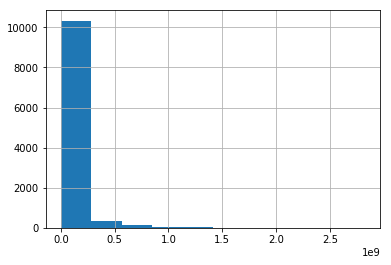

In [8]:
# visualization of adjusted revenue distribution
df.revenue_adj.hist()

### Data Cleaning

We will start by creating a dataframe with columns we're intrested in, namely (film title, tagline, keywords, overview and adjusted revenue)

In [9]:
#create a dataframe to include original_title, tagline, keywords, overview and revenue_adj to work with separatly

wording_df=df[['original_title','tagline','keywords','overview','genres','cast','revenue_adj']]
wording_df.head()

original_title                        tagline  \
0                Jurassic World              The park is open.   
1            Mad Max: Fury Road             What a Lovely Day.   
2                     Insurgent     One Choice Can Destroy You   
3  Star Wars: The Force Awakens  Every generation has a story.   
4                     Furious 7            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  \
0  Twenty-two years after the events of Jurassic ...   
1  An apocalyptic story set in the furthest reach...   
2  Beatrice Prior must confront her inner demons ...   
3  Thirty years after defeating the Galactic Empi...   
4  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                                cast   revenue_adj  
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  1.392446e+09  
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...  3.481613e+08  
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  2.716190e+08  
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...  1.902723e+09  
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...  1.385749e+09

In [10]:
#check dataframe dimensions and amount of missing data
print(wording_df.shape)
wording_df.isnull().sum()

(10866, 7)


original_title       0
tagline           2824
keywords          1493
overview             4
genres              23
cast                76
revenue_adj          0
dtype: int64

In [11]:
#drop all rows with missing data
wording_df.dropna (axis = 0, inplace = True)
wording_df.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(7305, 7)

In [12]:
wording_df.head()

original_title                        tagline  \
0                Jurassic World              The park is open.   
1            Mad Max: Fury Road             What a Lovely Day.   
2                     Insurgent     One Choice Can Destroy You   
3  Star Wars: The Force Awakens  Every generation has a story.   
4                     Furious 7            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  \
0  Twenty-two years after the events of Jurassic ...   
1  An apocalyptic story set in the furthest reach...   
2  Beatrice Prior must confront her inner demons ...   
3  Thirty years after defeating the Galactic Empi...   
4  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                                cast   revenue_adj  
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  1.392446e+09  
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...  3.481613e+08  
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  2.716190e+08  
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...  1.902723e+09  
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...  1.385749e+09

In [13]:
# function for charachter replacment
def replace_char(df, col, oc, nc):
    df[col] = [x.replace(oc, nc) for x in df[col]]

In [14]:
#replacing spaces in cast names with '_'
replace_char(wording_df,'cast',' ','_')

#replacing '|' with a space
replace_char(wording_df,'keywords','|', ' ')
replace_char(wording_df,'genres','|', ' ')
replace_char(wording_df,'cast','|', ' ')

wording_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


original_title                        tagline  \
0                Jurassic World              The park is open.   
1            Mad Max: Fury Road             What a Lovely Day.   
2                     Insurgent     One Choice Can Destroy You   
3  Star Wars: The Force Awakens  Every generation has a story.   
4                     Furious 7            Vengeance Hits Home   

                                            keywords  \
0  monster dna tyrannosaurus rex velociraptor island   
1   future chase post-apocalyptic dystopia australia   
2  based on novel revolution dystopia sequel dyst...   
3              android spaceship jedi space opera 3d   
4                car race speed revenge suspense car   

                                            overview  \
0  Twenty-two years after the events of Jurassic ...   
1  An apocalyptic story set in the furthest reach...   
2  Beatrice Prior must confront her inner demons ...   
3  Thirty years after defeating the Galactic Empi...   
4  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  \
0  Action Adventure Science Fiction Thriller   
1  Action Adventure Science Fiction Thriller   
2         Adventure Science Fiction Thriller   
3   Action Adventure Science Fiction Fantasy   
4                      Action Crime Thriller   

                                                cast   revenue_adj  
0  Chris_Pratt Bryce_Dallas_Howard Irrfan_Khan Vi...  1.392446e+09  
1  Tom_Hardy Charlize_Theron Hugh_Keays-Byrne Nic...  3.481613e+08  
2  Shailene_Woodley Theo_James Kate_Winslet Ansel...  2.716190e+08  
3  Harrison_Ford Mark_Hamill Carrie_Fisher Adam_D...  1.902723e+09  
4  Vin_Diesel Paul_Walker Jason_Statham Michelle_...  1.385749e+09

The keywords, geners and casts are separated with '|' with no space separtions.

In [15]:
# replace(Science Fiction) with (Science_Fiction)
replace_char(wording_df,'genres','Science Fiction', 'Science_Fiction')

wording_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


original_title                        tagline  \
0                Jurassic World              The park is open.   
1            Mad Max: Fury Road             What a Lovely Day.   
2                     Insurgent     One Choice Can Destroy You   
3  Star Wars: The Force Awakens  Every generation has a story.   
4                     Furious 7            Vengeance Hits Home   

                                            keywords  \
0  monster dna tyrannosaurus rex velociraptor island   
1   future chase post-apocalyptic dystopia australia   
2  based on novel revolution dystopia sequel dyst...   
3              android spaceship jedi space opera 3d   
4                car race speed revenge suspense car   

                                            overview  \
0  Twenty-two years after the events of Jurassic ...   
1  An apocalyptic story set in the furthest reach...   
2  Beatrice Prior must confront her inner demons ...   
3  Thirty years after defeating the Galactic Empi...   
4  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  \
0  Action Adventure Science_Fiction Thriller   
1  Action Adventure Science_Fiction Thriller   
2         Adventure Science_Fiction Thriller   
3   Action Adventure Science_Fiction Fantasy   
4                      Action Crime Thriller   

                                                cast   revenue_adj  
0  Chris_Pratt Bryce_Dallas_Howard Irrfan_Khan Vi...  1.392446e+09  
1  Tom_Hardy Charlize_Theron Hugh_Keays-Byrne Nic...  3.481613e+08  
2  Shailene_Woodley Theo_James Kate_Winslet Ansel...  2.716190e+08  
3  Harrison_Ford Mark_Hamill Carrie_Fisher Adam_D...  1.902723e+09  
4  Vin_Diesel Paul_Walker Jason_Statham Michelle_...  1.385749e+09

In [16]:
wording_df.shape

(7305, 7)

Now we have a dataframe of 7,323 films along with their respective taglines, keywords and overviews.

<a id='eda'></a>
## Exploratory Data Analysis

### What keywords can give a clue for a high revenue films, and which ones could indicate a low revenue film?

First we will create a word cloud of keywords for the entire 7000 films

In [ ]:
# create a set of words to be ignored
stopwords = set(STOPWORDS)

In [21]:
#a function to create word clouds
def wordcloud(wc_name, df, col):
    # instantiate a word cloud object
    wc_name = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
    
    # generate the word cloud
    wc_name.generate(' '.join(df[col]))
    
    #plot the word cloud
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    plt.imshow(wc_name, interpolation='bilinear')
    plt.axis('off')
    plt.show()

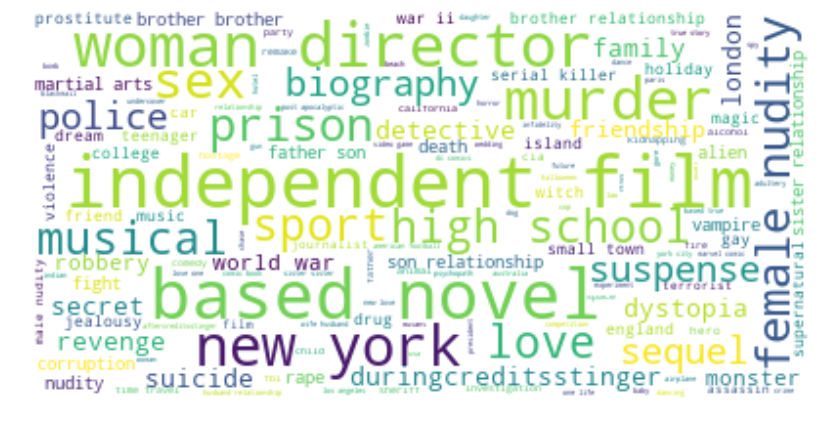

In [22]:
wordcloud('wc_kw', wording_df, 'keywords')

In [24]:
# these words are too common to be indicative, so we will add them to the stopwords to be ignored then we run again
add_words=('one', 'two', 'will', 'film', 'become','take')

for i in add_words:
    stopwords.add(i) # add the words said to stopwords


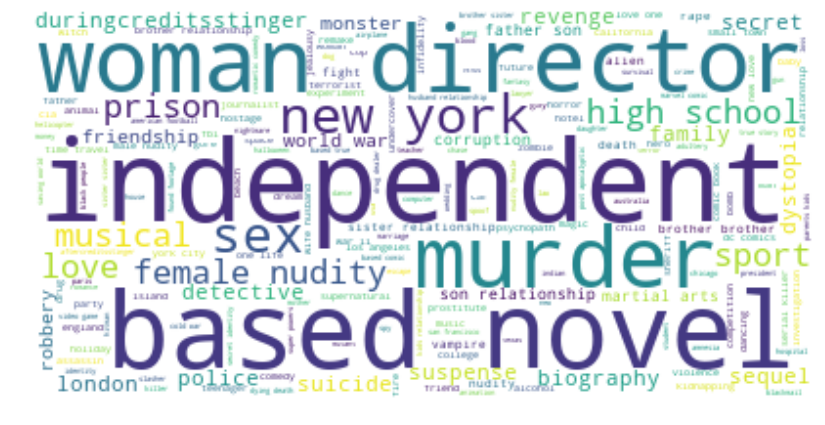

In [25]:
wordcloud('wc_kw', wording_df, 'keywords')

We can see that words like (independant, novel based, woman, director and murder) are the most occuring keywords within all 7000 films.

Lets do the same with high revenue films.

In [26]:
#first we find min, mean, 75 percentile and max values for adjusted revenue
wording_df.describe()

revenue_adj
count  7.305000e+03
mean   7.360658e+07
std    1.703796e+08
min    0.000000e+00
25%    0.000000e+00
50%    4.010409e+06
75%    7.172866e+07
max    2.827124e+09

In [27]:
#filter for films with adjusted revenues above the 75 percentile
above_75 =  wording_df['revenue_adj']>=71568080
filter_75 = wording_df[above_75]

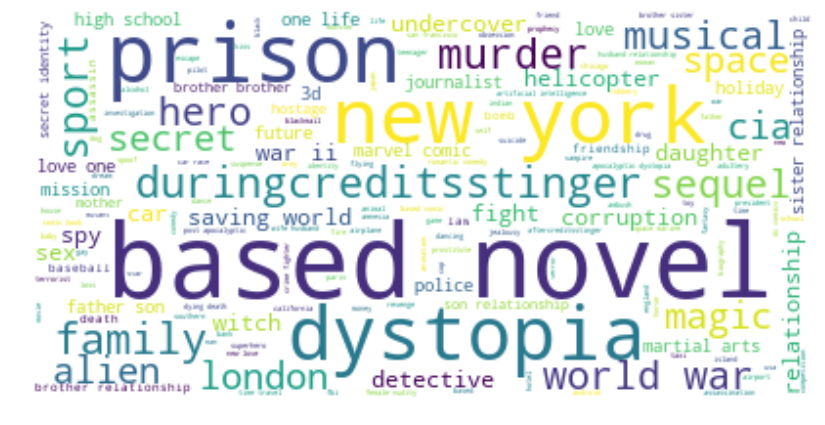

In [28]:
wordcloud('wc_kw_75', filter_75, 'keywords')

We can see that keywords like (novel, based) are still there, however, new keywords are evident here, such as (prison, dystopia, new york).
Now, lets look at the low revenue films.

In [29]:
#filter for films with adjusted revenues below the 50 percentile
below_50 =  wording_df['revenue_adj']>=3806378
filter_low = wording_df[below_50]

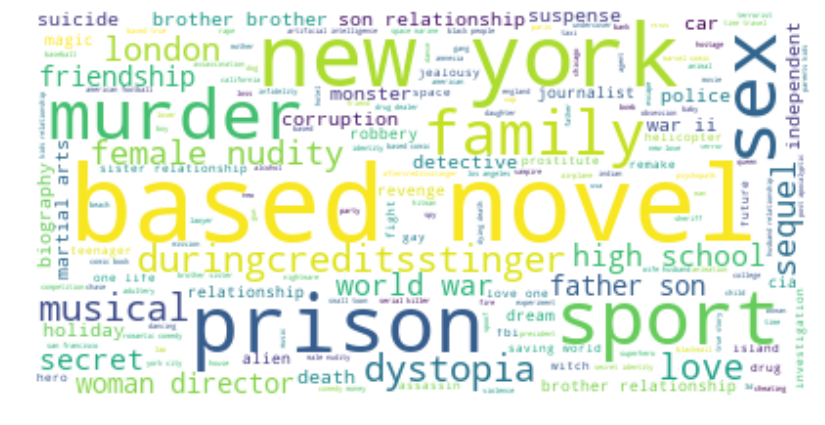

In [30]:
wordcloud('wc_kw_50', filter_low, 'keywords')

It seems like keywords such as (novel, based, new york, prison, murder) are repeated between high return and low return films, they can be added to the stopwords to neutrelize them from the comparison. While words like (sports, family, sex) may be an indication for a low revenue film.

In [31]:
# lets add the words that were found common betwen high return films and low return films
add_words=('novel', 'based', 'new', 'york', 'prison', 'murder')

for i in add_words:
    stopwords.add(i) # add the words said to stopwords

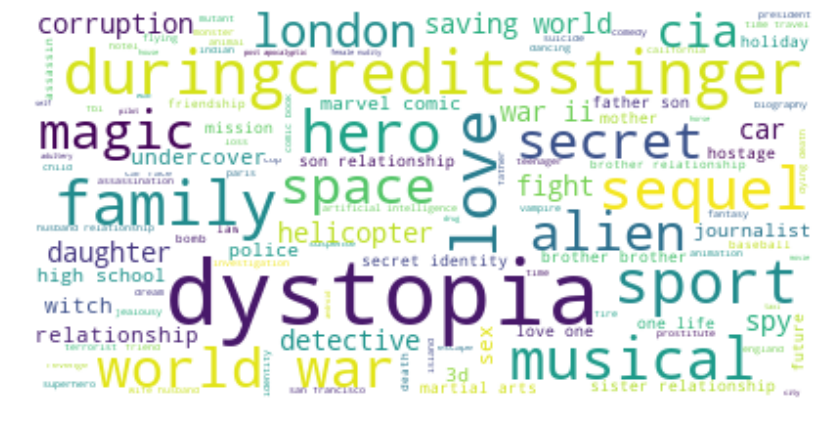

In [32]:
wordcloud('wc_kw_75', filter_75, 'keywords')

If you want to watch a good movie, look for some of the above keywords :)

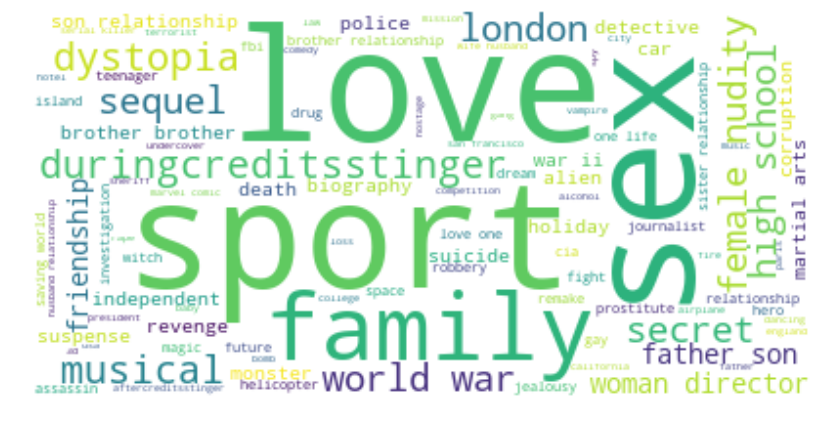

In [33]:
wordcloud('wc_kw_50', filter_low, 'keywords')

And avoid watching movies with the above keywords.

### Which actors contribute to high gross movies?

In [39]:
wording_df.head()

original_title                        tagline  \
0                Jurassic World              The park is open.   
1            Mad Max: Fury Road             What a Lovely Day.   
2                     Insurgent     One Choice Can Destroy You   
3  Star Wars: The Force Awakens  Every generation has a story.   
4                     Furious 7            Vengeance Hits Home   

                                            keywords  \
0  monster dna tyrannosaurus rex velociraptor island   
1   future chase post-apocalyptic dystopia australia   
2  based on novel revolution dystopia sequel dyst...   
3              android spaceship jedi space opera 3d   
4                car race speed revenge suspense car   

                                            overview  \
0  Twenty-two years after the events of Jurassic ...   
1  An apocalyptic story set in the furthest reach...   
2  Beatrice Prior must confront her inner demons ...   
3  Thirty years after defeating the Galactic Empi...   
4  Deckard Shaw seeks revenge against Dominic Tor...   

                                      genres  \
0  Action Adventure Science_Fiction Thriller   
1  Action Adventure Science_Fiction Thriller   
2         Adventure Science_Fiction Thriller   
3   Action Adventure Science_Fiction Fantasy   
4                      Action Crime Thriller   

                                                cast   revenue_adj  
0  Chris_Pratt Bryce_Dallas_Howard Irrfan_Khan Vi...  1.392446e+09  
1  Tom_Hardy Charlize_Theron Hugh_Keays-Byrne Nic...  3.481613e+08  
2  Shailene_Woodley Theo_James Kate_Winslet Ansel...  2.716190e+08  
3  Harrison_Ford Mark_Hamill Carrie_Fisher Adam_D...  1.902723e+09  
4  Vin_Diesel Paul_Walker Jason_Statham Michelle_...  1.385749e+09

Lets see which actors stand out among the entire list of 7000 movies

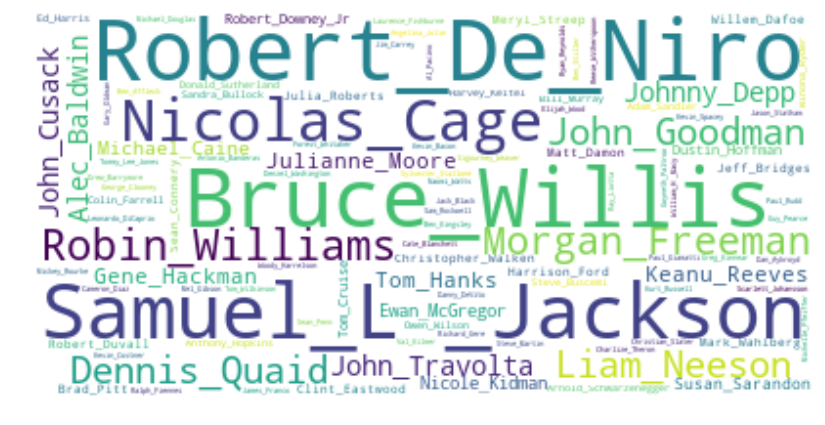

In [34]:
wordcloud('wc_cast', wording_df, 'cast')

Robert De Niro, Samuel L. Jackson, Bruce Willis and Nicolas Cage are indeed the stars of this dataframe.
Lets see who satnd out in the high revenue movies

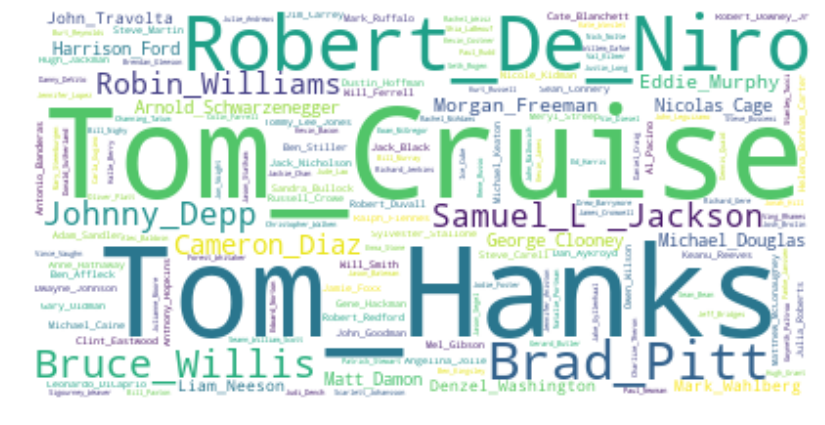

In [35]:
wordcloud('wc_cast_75', filter_75, 'cast')

There you have it, Robert De Niro, Tom Cruise and Tom Hanks contribute to the highest money making movies.
Lets see who stars the low revenue movies.

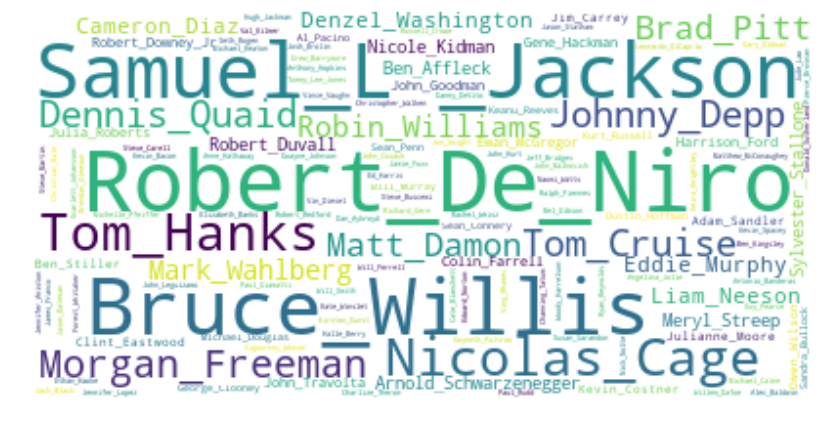

In [36]:
wordcloud('wc_cast_50', filter_low, 'cast')

Robert De Niro, Samuel L. Jackson, Bruce Willis and Nicolas Cage are also stars in the low return movies. Which makes Tom Cruise and Tom Hanks the biggest contributors in movie revenues.

### Numerically, what other attributes can indicate a high revenue movie?

Lets see how the numbers stack up against each other

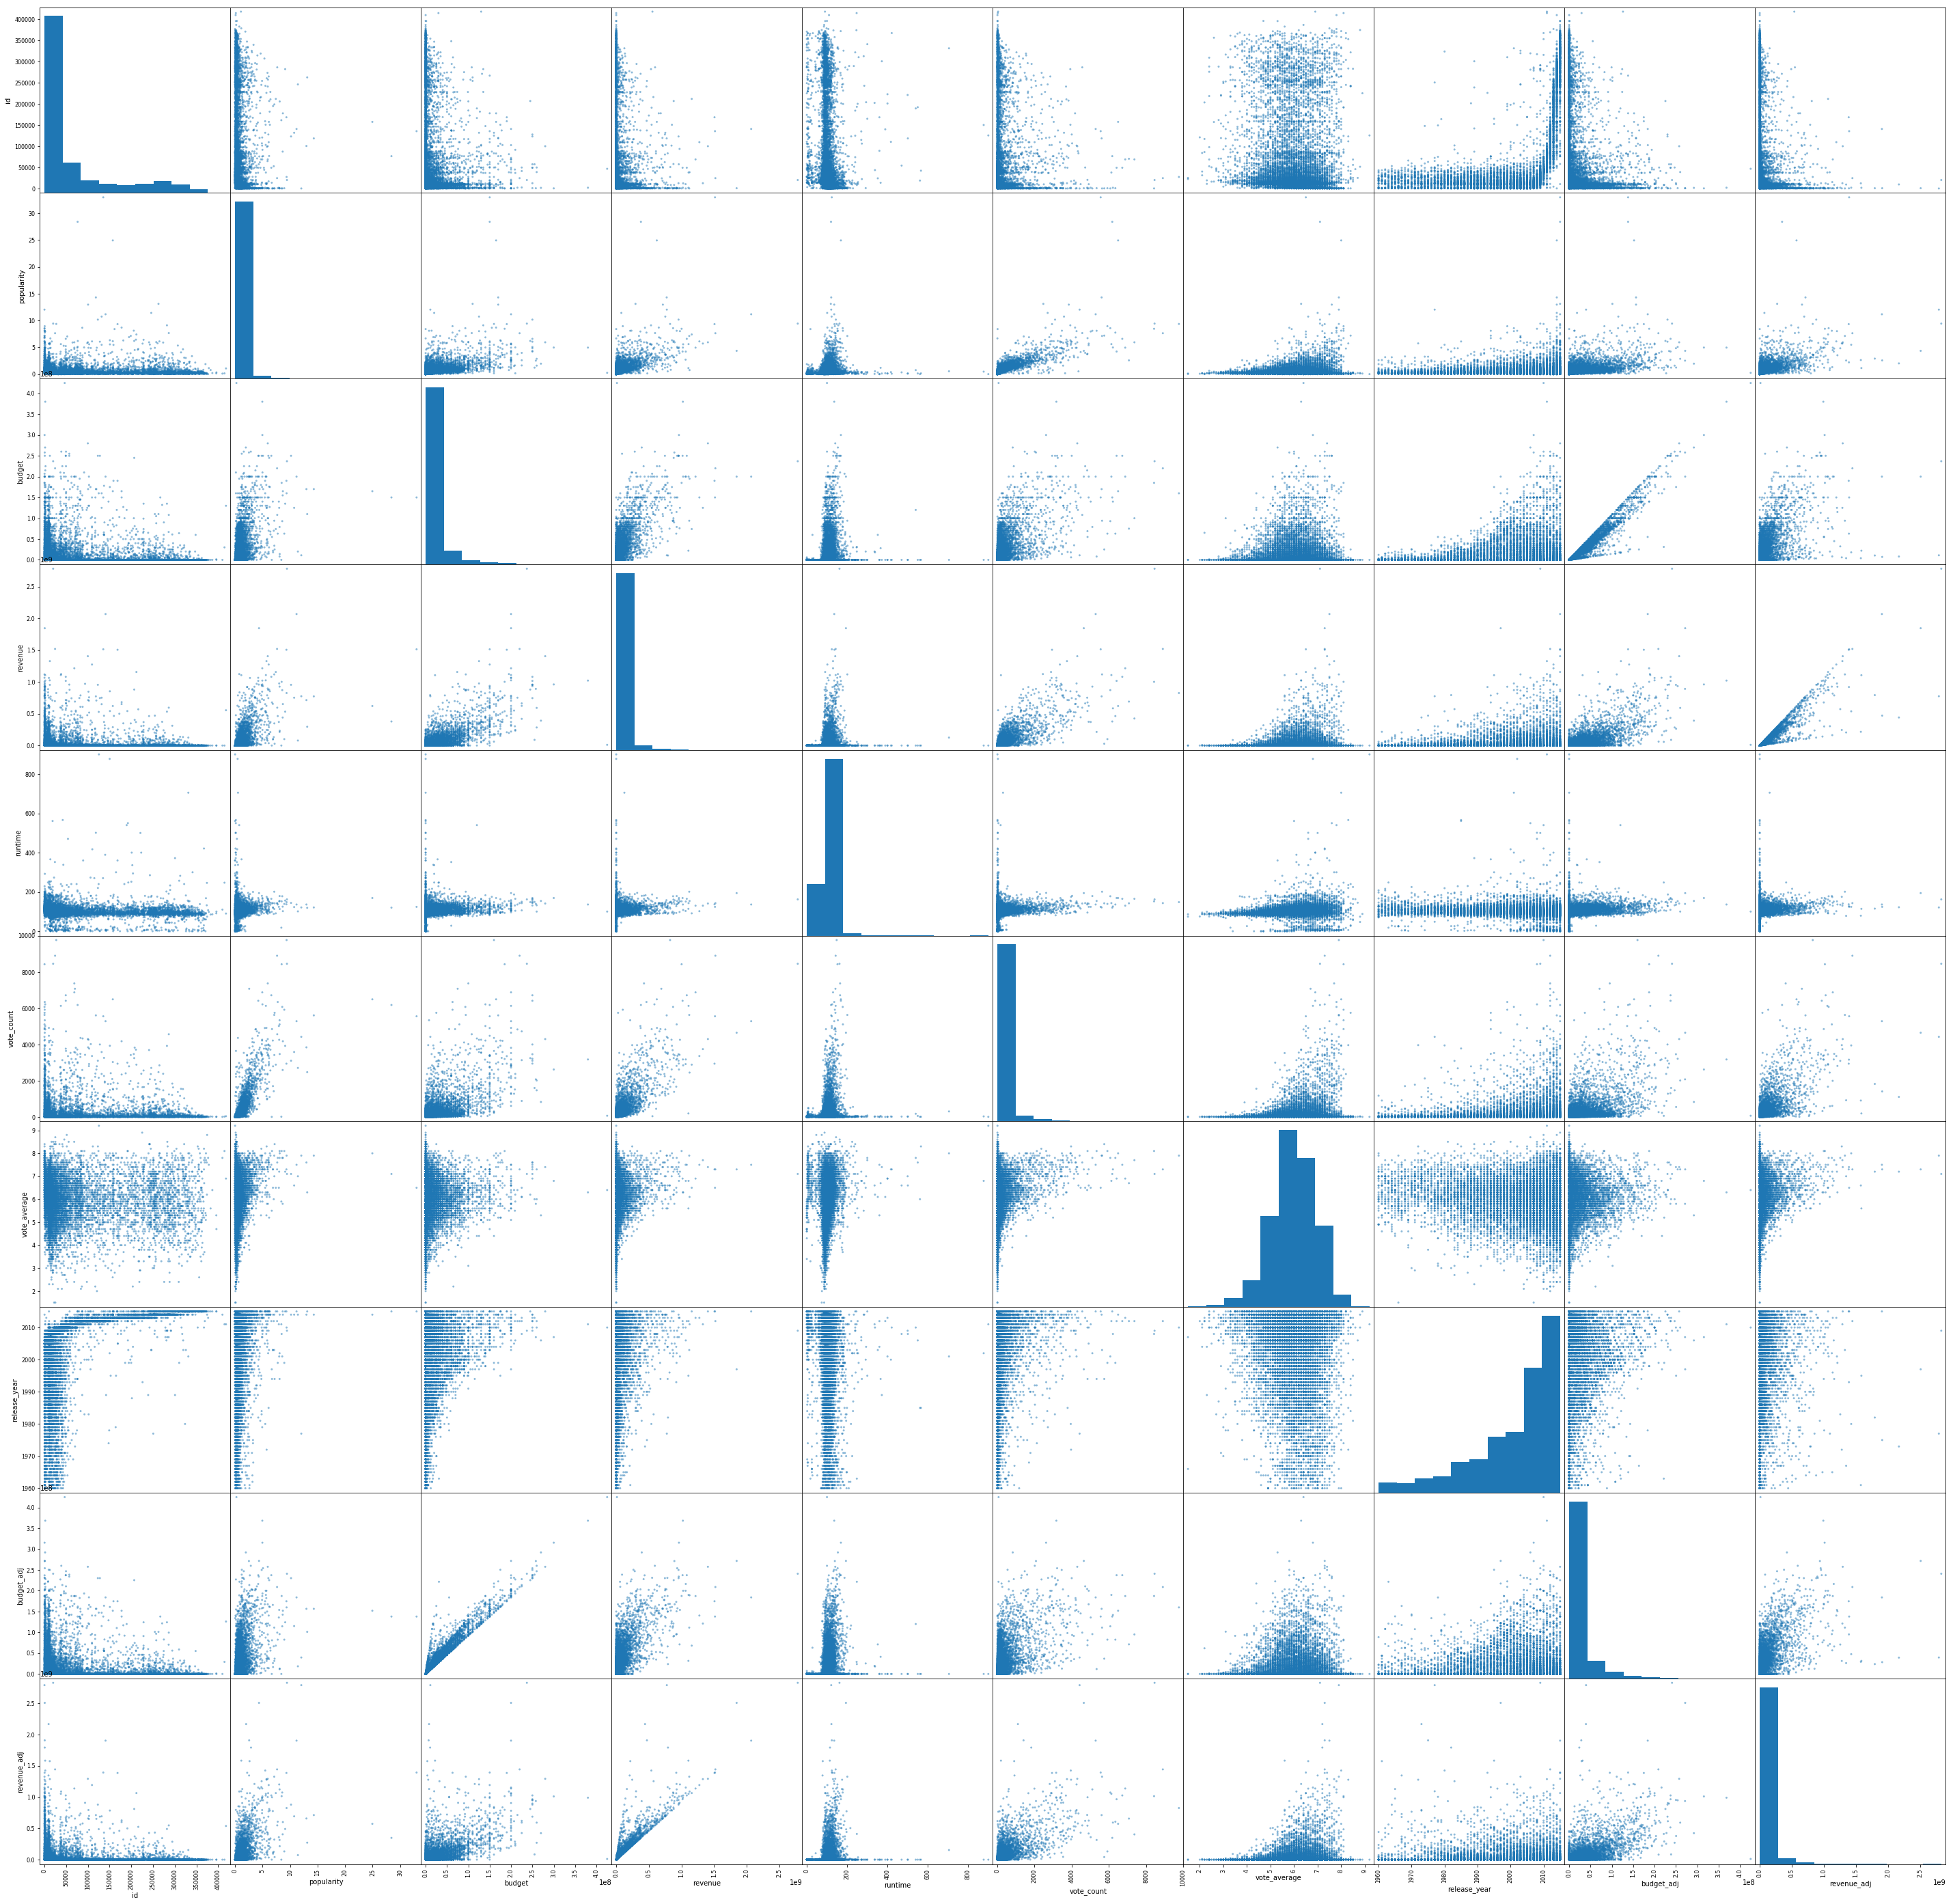

In [37]:
pd.plotting.scatter_matrix(df,figsize=(50,50));

In [38]:
#corrolation between numerical attributes
df.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.014350 -0.141351 -0.099227 -0.088360   -0.035551   
popularity   -0.014350    1.000000  0.545472  0.663358  0.139033    0.800828   
budget       -0.141351    0.545472  1.000000  0.734901  0.191283    0.632702   
revenue      -0.099227    0.663358  0.734901  1.000000  0.162838    0.791175   
runtime      -0.088360    0.139033  0.191283  0.162838  1.000000    0.163278   
vote_count   -0.035551    0.800828  0.632702  0.791175  0.163278    1.000000   
vote_average -0.058363    0.209511  0.081014  0.172564  0.156835    0.253823   
release_year  0.511364    0.089801  0.115931  0.057048 -0.117204    0.107948   
budget_adj   -0.189015    0.513550  0.968963  0.706427  0.221114    0.587051   
revenue_adj  -0.138477    0.609083  0.622505  0.919110  0.175676    0.707942   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.058363      0.511364   -0.189015    -0.138477  
popularity        0.209511      0.089801    0.513550     0.609083  
budget            0.081014      0.115931    0.968963     0.622505  
revenue           0.172564      0.057048    0.706427     0.919110  
runtime           0.156835     -0.117204    0.221114     0.175676  
vote_count        0.253823      0.107948    0.587051     0.707942  
vote_average      1.000000     -0.117632    0.093039     0.193085  
release_year     -0.117632      1.000000    0.016793    -0.066256  
budget_adj        0.093039      0.016793    1.000000     0.646607  
revenue_adj       0.193085     -0.066256    0.646607     1.000000

looking at the corrolation matrix, it is evident that numerical factors that impact adjusted revenue are (vote count, adjusted budget, poularity.
Budget and revenue values do have high statistical corrolations but are not logical since they are already represented in adjusted budget and adjusted revenue

Corrolation between adjusted revenue and number of votes is:  0.707941568221


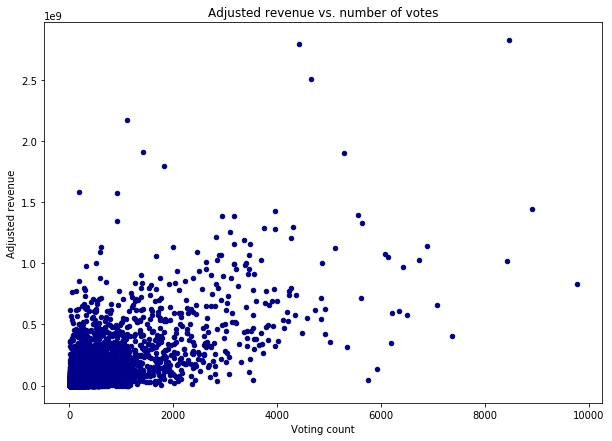

In [39]:
#lets plot the vote count against the adjusted revenue
df.plot(kind='scatter', x='vote_count', y='revenue_adj', figsize=(10, 7), color='darkblue')

print('Corrolation between adjusted revenue and number of votes is: ',df['revenue_adj'].corr(df['vote_count']))
plt.xlabel('Voting count')
plt.ylabel('Adjusted revenue')
plt.title('Adjusted revenue vs. number of votes')
plt.show()

Corrolation between adjusted revenue and adjusted budget is:  0.646607441061


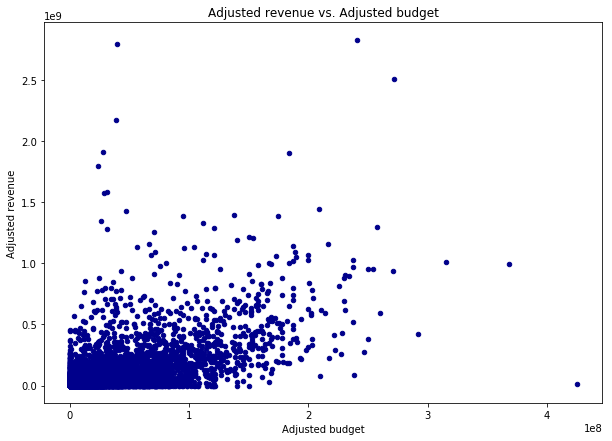

In [40]:
#lets plot the adjusted revenue against the adjusted revenue
df.plot(kind='scatter', x='budget_adj', y='revenue_adj', figsize=(10, 7), color='darkblue')

print('Corrolation between adjusted revenue and adjusted budget is: ',df['revenue_adj'].corr(df['budget_adj']))
plt.xlabel('Adjusted budget')
plt.ylabel('Adjusted revenue')
plt.title('Adjusted revenue vs. Adjusted budget')
plt.show()

Corrolation between adjusted revenue and popularity is:  0.609083432282


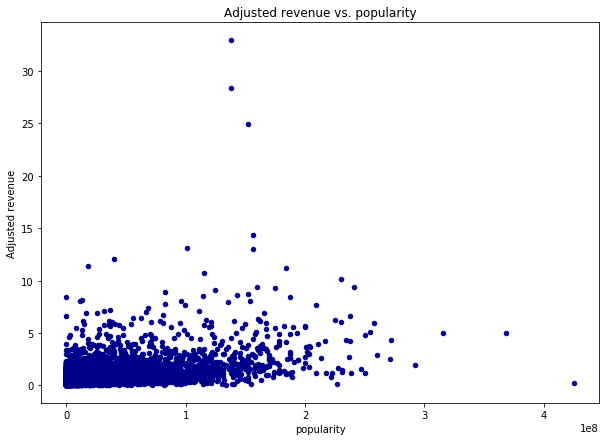

In [41]:
#lets plot the vote count against the adjusted revenue
df.plot(kind='scatter', x='budget_adj', y='popularity', figsize=(10, 7), color='darkblue')

print('Corrolation between adjusted revenue and popularity is: ',df['revenue_adj'].corr(df['popularity']))
plt.xlabel('popularity')
plt.ylabel('Adjusted revenue')
plt.title('Adjusted revenue vs. popularity')
plt.show()

## Conclusions

### Assumptions:
* Adjusted revenue was used to indicate how good is a movie.

### Findings
* Keywords listed against each movie can be a good indication to a good, high revenue, movie and may also be used to indicate a low revenue movie.
* Cast (actors names) was not very decisive in indicating a high return movie, as only one or two names stood out as markers. However, it can be further improved to achieve better results.
* Numerically speaking, it was surprising to see that the number of votes is a better indicator than the average of votes.
* The movie budget can also be a good indicator which has a slightly better corrolation than poularity.

**A final word:** If you want to watch a movie tonight, look for a dystopian Tom cruise movie with high budget and many reviews/votes ;) 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0